In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
dataset = pd.read_csv("C:\\Users\\USER\\Desktop\\STARTUP_TECH_INTERN\\datafile_train.csv")
y = pd.read_csv("C:\\Users\\USER\\Desktop\\STARTUP_TECH_INTERN\\test.csv")

In [4]:
dataset.head()

,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,1.0,Tier 1,Manager,Non-Metro,55523.0,3.0,66.0,19.0,71406.58
1,2.0,Tier 2,Executive,Metro,57081.0,1.0,84.0,18.0,68005.87
2,3.0,Tier 2,Executive,Metro,60347.0,2.0,52.0,28.0,76764.02
3,4.0,Tier 3,Executive,Metro,49010.0,2.0,81.0,33.0,82092.39
4,5.0,Tier 3,Executive,Metro,57879.0,4.0,74.0,32.0,73878.10


In [5]:
dataset.isnull().sum()


S.No.                   23
College                 23
Role                    23
City type               23
Previous CTC            23
Previous job changes    23
Graduation marks        23
Exp (Months)            23
CTC                     23
dtype: int64

In [6]:
#dataset_ = dataset.replace('[^\d.'']', '', regex=True).astype(float)

In [7]:
dataset.dropna(inplace=True)


In [8]:
dataset.isna().any()


S.No.                   False
College                 False
Role                    False
City type               False
Previous CTC            False
Previous job changes    False
Graduation marks        False
Exp (Months)            False
CTC                     False
dtype: bool

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.No.                 1338 non-null   float64
 1   College               1338 non-null   object 
 2   Role                  1338 non-null   object 
 3   City type             1338 non-null   object 
 4   Previous CTC          1338 non-null   float64
 5   Previous job changes  1338 non-null   float64
 6   Graduation marks      1338 non-null   float64
 7   Exp (Months)          1338 non-null   float64
 8   CTC                   1338 non-null   float64
dtypes: float64(6), object(3)
memory usage: 104.5+ KB


In [10]:
dataset.describe()

,S.No.,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,669.500000,55581.762332,2.525411,59.890882,39.207025,75459.339036
std,386.391641,6685.600553,1.123502,14.894696,14.049960,12551.280147
min,1.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,335.250000,50547.000000,2.000000,47.000000,27.000000,66905.067500
50%,669.500000,55293.500000,3.000000,60.000000,39.000000,73112.640000
75%,1003.750000,60150.500000,4.000000,73.000000,51.000000,80747.175000
max,1338.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000


In [11]:
#my_float = float(my_str.replace(',', ' ').replace('$',''))
#my_float = float(dataset.replace(',', ''))
#import locale
#locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
#locale_num = locale.atof(dataset)
#print(locale_num, type(locale_num))

In [12]:
#dataset['Previous CTC'].plot(figsize=(16,6))

In [13]:
X = dataset[['Previous CTC','Previous job changes','Graduation marks','Exp (Months)']]
y = dataset['CTC']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [15]:
X_train.shape

(1003, 4)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [17]:
regressor.fit(X_train, y_train)
#v = '56,405.00'
#my_float = float(my_str.replace(',', ' ').replace('$',''))
#my_float = float(v.replace(',', ''))

LinearRegression()

In [18]:
print(regressor.coef_)

[   0.43458978 -139.59399431   -6.02952645  218.47704542]


In [19]:
print(regressor.intercept_)

43383.192695977


In [20]:
predicted = regressor.predict(X_test)

In [21]:
print(X_test)

      Previous CTC  Previous job changes  Graduation marks  Exp (Months)
578        55453.0                   3.0              67.0          52.0
610        56043.0                   1.0              44.0          47.0
569        64558.0                   3.0              47.0          48.0
1034       59128.0                   1.0              56.0          61.0
198        44451.0                   1.0              65.0          51.0
...            ...                   ...               ...           ...
574        64225.0                   4.0              43.0          57.0
1174       55074.0                   3.0              79.0          29.0
1327       57311.0                   3.0              54.0          51.0
817        58422.0                   2.0              54.0          23.0
1337       51820.0                   1.0              47.0          61.0

[335 rows x 4 columns]


In [22]:
predicted.shape

(335,)

In [23]:
dframe =pd.DataFrame(y_test, predicted)

In [24]:
dfr =pd.DataFrame({'Actual': y_test, 'CTC':predicted})

In [25]:
print(dfr)

        Actual           CTC
578   71105.71  78020.545683
610   62426.39  77602.435521
569   99734.64  81224.167946
1034  85083.58  81929.469300
198   59721.74  73311.958957
...        ...           ...
574   80470.64  82930.267070
1174  67749.39  72758.509795
1327  66931.93  78687.920286
817   75585.98  73192.986250
1337  83346.06  78807.752951

[335 rows x 2 columns]


In [26]:
dfr.head(25)

,Actual,CTC
578,71105.71,78020.545683
610,62426.39,77602.435521
569,99734.64,81224.167946
1034,85083.58,81929.469300
198,59721.74,73311.958957
981,69525.33,71683.181631
31,69764.49,68336.734936
1256,67273.98,79612.991222
1219,63921.31,75303.188359
1320,61396.48,75716.162252


In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [28]:
regressor.score(X_test,y_test)

0.18217676355976986

In [29]:
import math
import sklearn.metrics as metrics

In [30]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 8933.101487074953


In [31]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))

Mean Squared Error: 140155895.04732913


In [32]:
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Squared Error: 11838.745501417332


In [33]:
graph = dfr.head(20)

<AxesSubplot:>

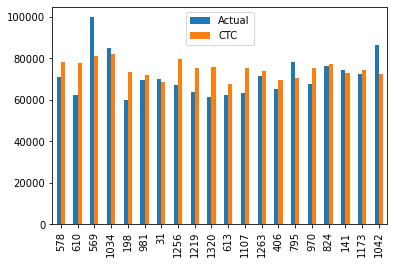

In [34]:
graph.plot(kind='bar')